In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


C:\Users\sagar\AppData\Local\Temp\ipykernel_5812\385566898.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disease_counts.index, y=disease_counts.values, ax=ax, palette="viridis")


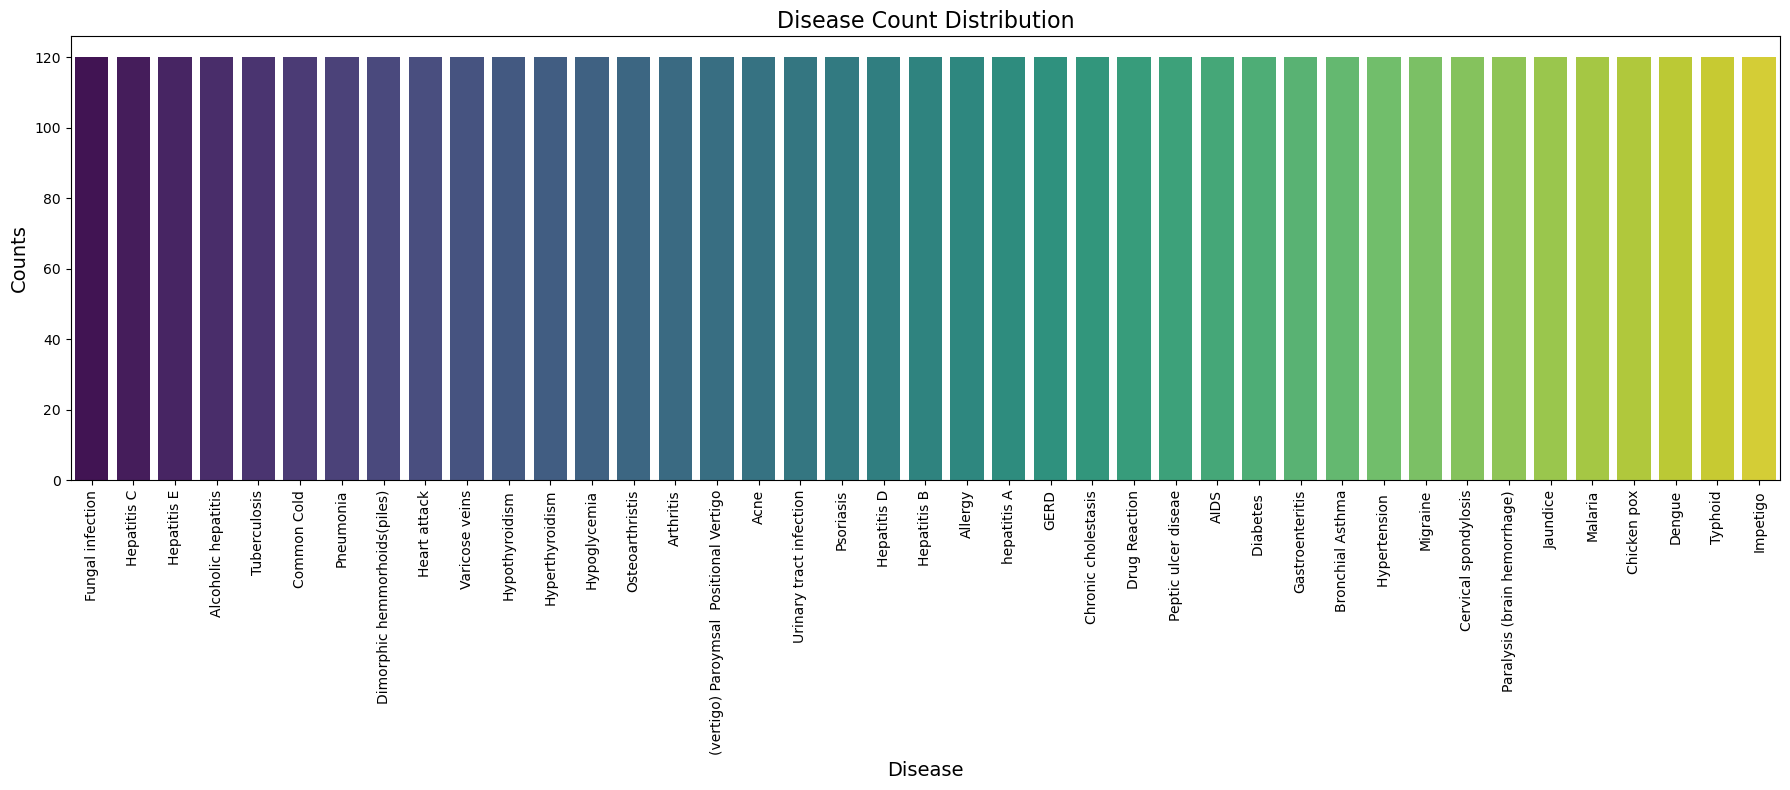

In [50]:
data = pd.read_csv("Training.csv")
data_cleaned = data.dropna(axis=1)

disease_counts = data_cleaned["prognosis"].value_counts()

fig, ax = plt.subplots(figsize=(18, 8))
sns.barplot(x=disease_counts.index, y=disease_counts.values, ax=ax, palette="viridis")

# Adding labels and title
ax.set_title("Disease Count Distribution", fontsize=16)
ax.set_xlabel("Disease", fontsize=14)
ax.set_ylabel("Counts", fontsize=14)

# Rotating x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

In [6]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

In [7]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [17]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {"SVC":SVC(),"Gaussian NB":GaussianNB(),"Random Forest":RandomForestClassifier(random_state=18)}

for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10, n_jobs = -1,scoring = cv_scoring)
    print("=="*60)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


In [18]:
svm_model =SVC()
svm_model.fit(X_train,y_train)
preds = svm_model.predict(X_test)
print(f"Accuracy on train data by svm Classifier\ :{accuracy_score(y_train,svm_model.predict(X_train))*100}")

Accuracy on train data by svm Classifier\ :100.0


SVM Classifier - Train Accuracy: 100.00%
SVM Classifier - Test Accuracy: 100.00%


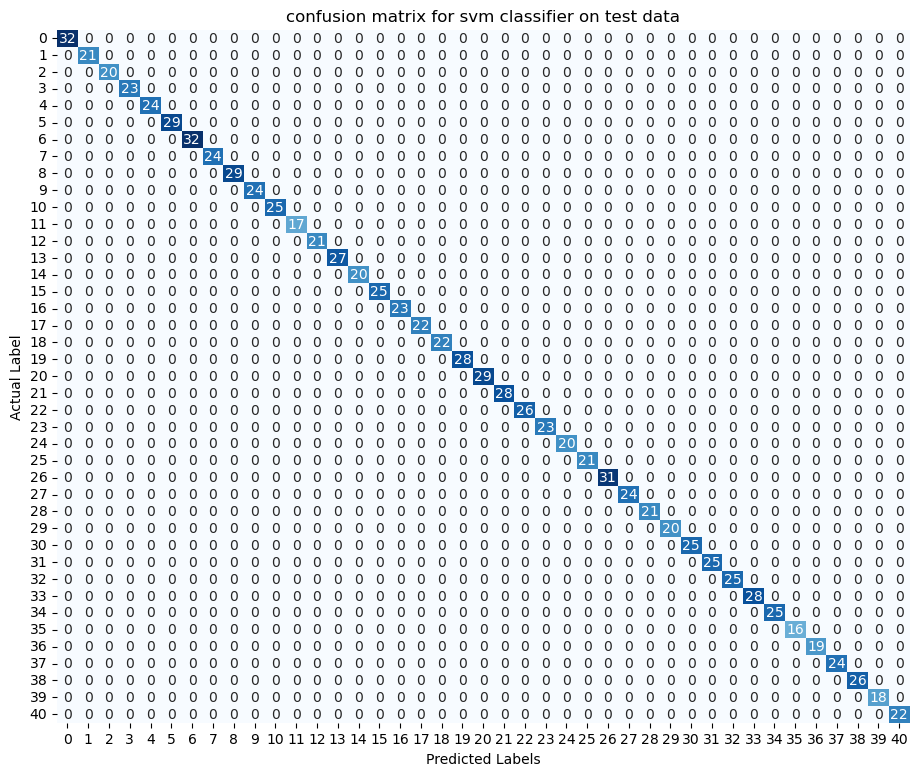

In [20]:
train_accuracy = accuracy_score(y_train, svm_model.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, svm_model.predict(X_test)) * 100
print(f"SVM Classifier - Train Accuracy: {train_accuracy:.2f}%")
print(f"SVM Classifier - Test Accuracy: {test_accuracy:.2f}%")
plt.figure(figsize =(11,9))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",cbar=False)
plt.title("confusion matrix for svm classifier on test data")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Label")
plt.show()

In [23]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\:{accuracy_score(y_train,nb_model.predict(X_train))*100}")

Accuracy on train data by Naive Bayes Classifier\:100.0


In [24]:
train_accuracy = accuracy_score(y_train, nb_model.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, nb_model.predict(X_test)) * 100
print(f"Naive Bayes Classifier - Train Accuracy: {train_accuracy:.2f}%")
print(f"Naive Bayes Classifier - Test Accuracy: {test_accuracy:.2f}%")

Naive Bayes Classifier - Train Accuracy: 100.00%
Naive Bayes Classifier - Test Accuracy: 100.00%


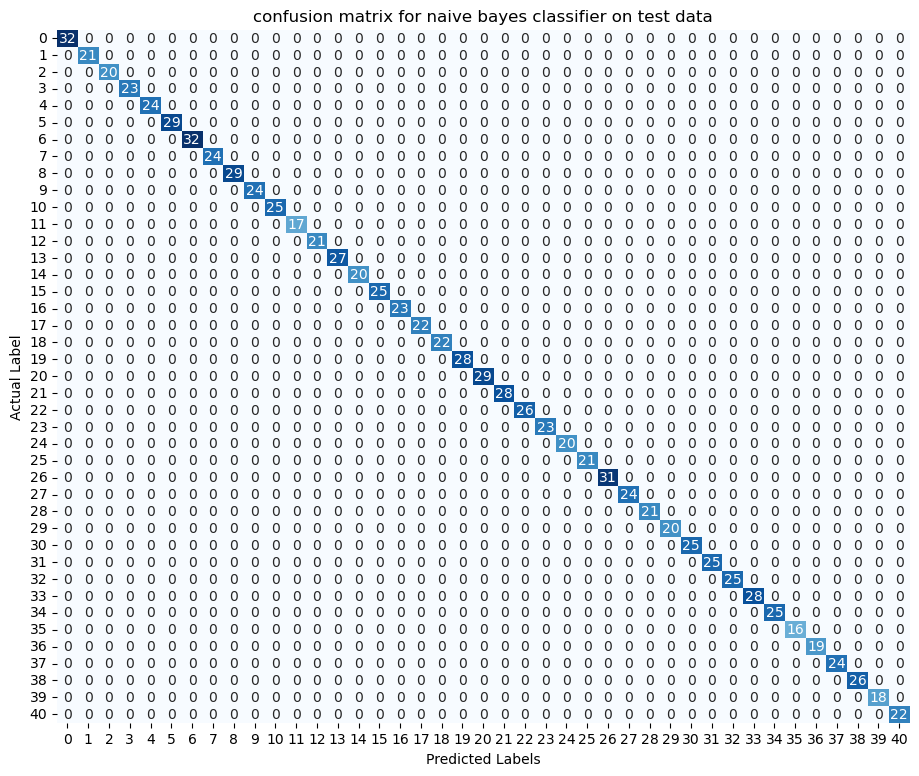

In [25]:
plt.figure(figsize =(11,9))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",cbar=False)
plt.title("confusion matrix for naive bayes classifier on test data")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Label")
plt.show()

Accuracy on train data by Random Forest Classifier\:100.0
Random Forest Classifier - Train Accuracy: 100.00%
Random Forest Classifier - Test Accuracy: 100.00%


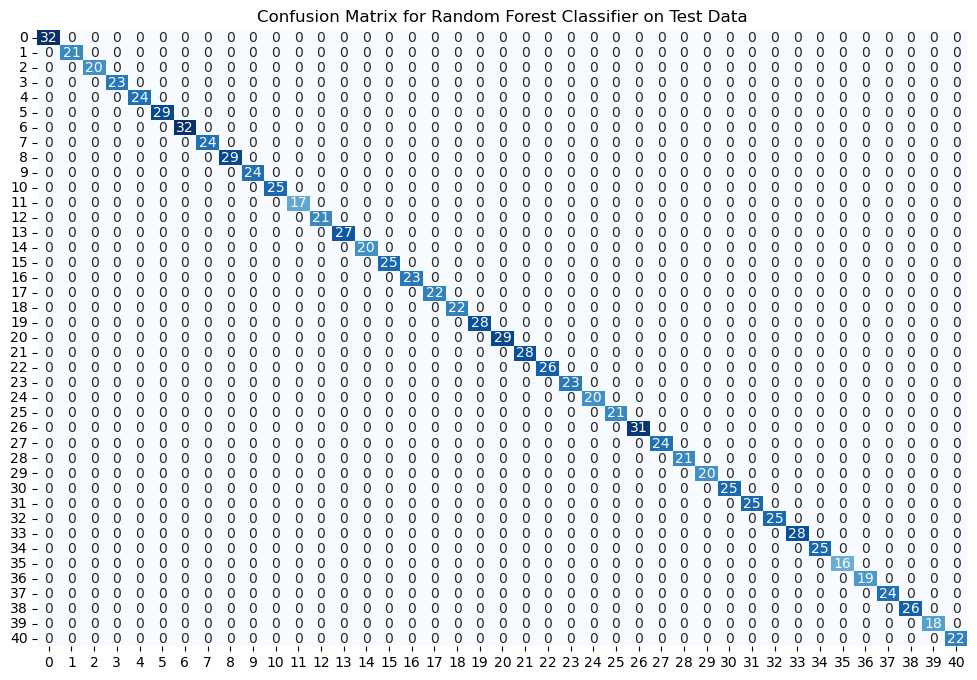

In [26]:
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\:{accuracy_score(y_train, rf_model.predict(X_train))*100}")
train_accuracy = accuracy_score(y_train, rf_model.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, rf_model.predict(X_test)) * 100
print(f"Random Forest Classifier - Train Accuracy: {train_accuracy:.2f}%")
print(f"Random Forest Classifier - Test Accuracy: {test_accuracy:.2f}%")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True,fmt="d",cmap="Blues",cbar=False )
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

In [29]:
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X,y)
final_nb_model.fit(X,y)
final_rf_model.fit(X,y)

test_data = pd.read_csv("Testing.csv").dropna(axis=1)
test_X = test_data.iloc[:,:-1]
test_y = encoder.transform(test_data.iloc[:, -1])

svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)


Defaulting to user installation because normal site-packages is not writeable
Accuracy on Test dataset by the combined model: 100.0


C:\Users\sagar\AppData\Local\Temp\ipykernel_5812\3702706398.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_preds = [stats.mode([i,j,k])[0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]


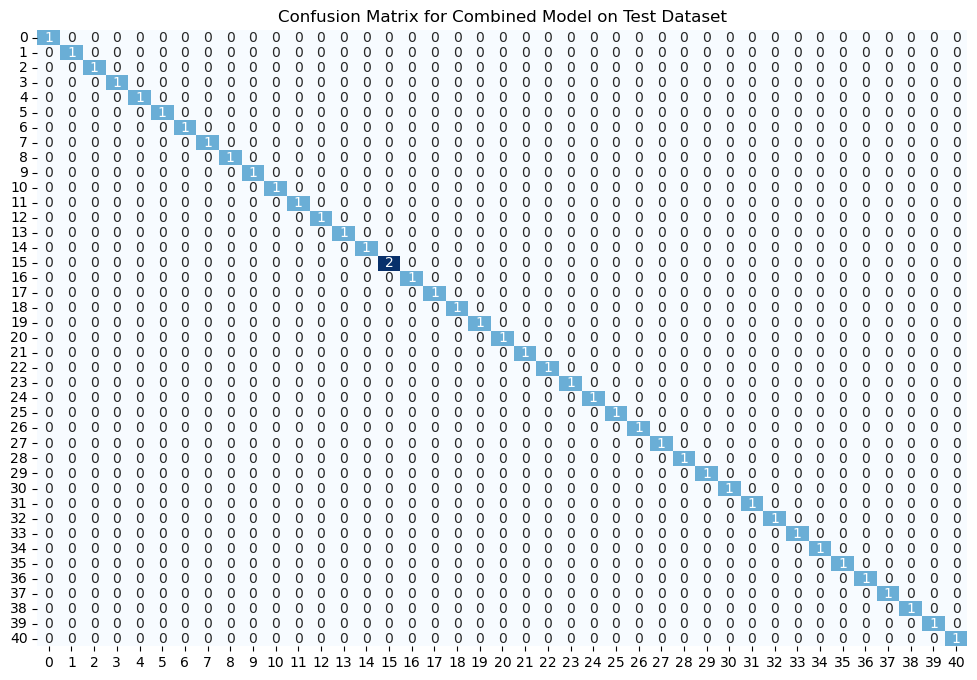

In [31]:
#!pip install scipy
from scipy import stats

final_preds = [stats.mode([i,j,k])[0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_y, final_preds)*100}")

cf_matrix = confusion_matrix(test_y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True,fmt="d",cmap="Blues",cbar=False)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

In [35]:
# Create a dictionary to map symptoms to their indices
symptom_index = {
    " ".join(word.capitalize() for word in symptom.split("_")): idx
    for idx, symptom in enumerate(X.columns)
}

# Store metadata for predictions
data_dict = {
    "symptom_index": symptom_index,
    "prediction_classes": encoder.classes_,
}

def predict_disease(input_symptoms):
    """
    Predicts the disease based on the input symptoms.

    Args:
        input_symptoms (str): Symptoms separated by commas (e.g., "Itching,Skin Rash").

    Returns:
        dict: Predictions from different models and the final consensus prediction.
    """
    # Parse and preprocess input symptoms
    symptoms_list = input_symptoms.split(",")
    input_vector = [0] * len(data_dict["symptom_index"])
    
    for symptom in symptoms_list:
        if symptom in data_dict["symptom_index"]:
            input_vector[data_dict["symptom_index"][symptom]] = 1
        else:
            raise ValueError(f"Symptom '{symptom}' is not recognized.")
    
    input_vector = np.array(input_vector).reshape(1, -1)

    # Generate predictions from each model
    predictions = {
        "Random Forest Prediction": data_dict["prediction_classes"][
            final_rf_model.predict(input_vector)[0]
        ],
        "Naive Bayes Prediction": data_dict["prediction_classes"][
            final_nb_model.predict(input_vector)[0]
        ],
        "SVM Prediction": data_dict["prediction_classes"][
            final_svm_model.predict(input_vector)[0]
        ],
    }

    # Determine the final consensus prediction
    import statistics
    predictions["Final Prediction"] = statistics.mode(predictions.values())

    return predictions

# Example usage
try:
    result = predict_disease("Chest Pain,Breathlessness,Palpitations")
    print(result)
except ValueError as e:
    print(f"Error: {e}")


{'Random Forest Prediction': 'Heart attack', 'Naive Bayes Prediction': 'Heart attack', 'SVM Prediction': 'Heart attack', 'Final Prediction': 'Heart attack'}


C:\Users\sagar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\sagar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\sagar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [38]:
# Display available symptoms
print("Available Symptoms:")
for symptom in data_dict["symptom_index"].keys():
    print(symptom)


Available Symptoms:
Itching
Skin Rash
Nodal Skin Eruptions
Continuous Sneezing
Shivering
Chills
Joint Pain
Stomach Pain
Acidity
Ulcers On Tongue
Muscle Wasting
Vomiting
Burning Micturition
Spotting  urination
Fatigue
Weight Gain
Anxiety
Cold Hands And Feets
Mood Swings
Weight Loss
Restlessness
Lethargy
Patches In Throat
Irregular Sugar Level
Cough
High Fever
Sunken Eyes
Breathlessness
Sweating
Dehydration
Indigestion
Headache
Yellowish Skin
Dark Urine
Nausea
Loss Of Appetite
Pain Behind The Eyes
Back Pain
Constipation
Abdominal Pain
Diarrhoea
Mild Fever
Yellow Urine
Yellowing Of Eyes
Acute Liver Failure
Fluid Overload
Swelling Of Stomach
Swelled Lymph Nodes
Malaise
Blurred And Distorted Vision
Phlegm
Throat Irritation
Redness Of Eyes
Sinus Pressure
Runny Nose
Congestion
Chest Pain
Weakness In Limbs
Fast Heart Rate
Pain During Bowel Movements
Pain In Anal Region
Bloody Stool
Irritation In Anus
Neck Pain
Dizziness
Cramps
Bruising
Obesity
Swollen Legs
Swollen Blood Vessels
Puffy Face And 

In [40]:
# Corrected symptoms based on the available list
result0 = predict_disease("Fatigue,Weight Loss,Swelled Lymph Nodes")  # Updated the symptom format
print("Result 0:", result0)


Result 0: {'Random Forest Prediction': 'Jaundice', 'Naive Bayes Prediction': 'Jaundice', 'SVM Prediction': 'Urinary tract infection', 'Final Prediction': 'Jaundice'}


C:\Users\sagar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\sagar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\sagar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [41]:
result1 = predict_disease("Itching,Skin Rash,Nodal Skin Eruptions")
print("Result 1:", result1)


Result 1: {'Random Forest Prediction': 'Fungal infection', 'Naive Bayes Prediction': 'Fungal infection', 'SVM Prediction': 'Fungal infection', 'Final Prediction': 'Fungal infection'}


C:\Users\sagar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\sagar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\sagar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [42]:
result2 = predict_disease("Continuous Sneezing,Shivering,Chills")
print("Result 2:", result2)


Result 2: {'Random Forest Prediction': 'Allergy', 'Naive Bayes Prediction': 'Allergy', 'SVM Prediction': 'Allergy', 'Final Prediction': 'Allergy'}


C:\Users\sagar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\sagar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\sagar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [43]:
result3 = predict_disease("Fatigue,Weight Loss,Swelled Lymph Nodes")  # Corrected "Swollen Lymph Nodes"
print("Result 3:", result3)


Result 3: {'Random Forest Prediction': 'Jaundice', 'Naive Bayes Prediction': 'Jaundice', 'SVM Prediction': 'Urinary tract infection', 'Final Prediction': 'Jaundice'}


C:\Users\sagar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\sagar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\sagar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [44]:
result4 = predict_disease("Headache,Yellowish Skin,Back Pain")
print("Result 4:", result4)


Result 4: {'Random Forest Prediction': 'Cervical spondylosis', 'Naive Bayes Prediction': 'Paralysis (brain hemorrhage)', 'SVM Prediction': 'Paralysis (brain hemorrhage)', 'Final Prediction': 'Paralysis (brain hemorrhage)'}


C:\Users\sagar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\sagar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\sagar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [45]:
result5 = predict_disease("Mild Fever,Yellow Urine,Yellowing Of Eyes")
print("Result 5:", result5)


Result 5: {'Random Forest Prediction': 'hepatitis A', 'Naive Bayes Prediction': 'Hepatitis C', 'SVM Prediction': 'Urinary tract infection', 'Final Prediction': 'hepatitis A'}


C:\Users\sagar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\sagar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\sagar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [46]:
result6 = predict_disease("Cough,High Fever,Breathlessness")
print("Result 6:", result6)


Result 6: {'Random Forest Prediction': 'Bronchial Asthma', 'Naive Bayes Prediction': 'Bronchial Asthma', 'SVM Prediction': 'Bronchial Asthma', 'Final Prediction': 'Bronchial Asthma'}


C:\Users\sagar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\sagar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\sagar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
